# A. End-to-End

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

## 1. Reading data

In [2]:
path = 'data_endtoend/'
files = os.listdir(path)
files

['file1.csv', 'file2.csv']

#### Option 1

In [3]:
file1 = pd.read_csv("data_endtoend/file1.csv")
file1.head()

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


In [4]:
len(file1)

1007

In [5]:
file2 = pd.read_csv("data_endtoend/file2.csv")
file2.head()

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
0,185602,WI,F,400,232,315.0,0,10504,1,86,279.0,264,9.533333,28,0,R2,10.0
1,23603,SC,M,824,348,400.0,0,14663,2,40,371.0,365,12.500000,1,5801,S2,25.0
2,112943,OK,F,855,345,560.0,10,17869,2,64,384.0,508,8.729167,2,3601,T1,12.0
3,44853,FL,M,578,246,323.0,0,14121,3,13,323.0,275,10.642857,1,2912,C3,12.0
4,83094,MN,F,699,246,319.0,0,11020,1,81,254.0,304,13.600000,0,1211,T2,20.0


In [6]:
len(file2)

500

In [7]:
#concat both, check lengths, drop duplicates
df = pd.concat([file1,file2])
df.head()

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


In [8]:
len(df)

1507

In [9]:
df.CONTROLN.nunique() #how many different unique id's

999

In [10]:
df = df.drop_duplicates(["CONTROLN"])
len(df)

999

#### Option 2

In [ ]:
df = pd.DataFrame()
for file in files:
    if file.endswith('.csv'):
        data = pd.read_csv(path + file)
        df = pd.concat([df, data])       
df = df.drop_duplicates(["CONTROLN"])
df.head()

## 2. First explorations (info, describe...)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONTROLN  999 non-null    int64  
 1   STATE     999 non-null    object 
 2   GENDER    960 non-null    object 
 3   HV1       997 non-null    object 
 4   IC1       999 non-null    int64  
 5   IC4       998 non-null    float64
 6   HVP1      999 non-null    int64  
 7   IC5       999 non-null    object 
 8   POBC1     999 non-null    int64  
 9   POBC2     999 non-null    int64  
 10  IC2       998 non-null    float64
 11  IC3       999 non-null    int64  
 12  AVGGIFT   999 non-null    float64
 13  TCODE     999 non-null    int64  
 14  DOB       999 non-null    int64  
 15  DOMAIN    999 non-null    object 
 16  TARGET_D  999 non-null    float64
dtypes: float64(4), int64(8), object(5)
memory usage: 140.5+ KB


## 3. Data Cleaning

In [12]:
df.columns

Index(['CONTROLN', 'STATE', 'GENDER', 'HV1', 'IC1', 'IC4', 'HVP1', 'IC5',
       'POBC1', 'POBC2', 'IC2', 'IC3', 'AVGGIFT', 'TCODE', 'DOB', 'DOMAIN',
       'TARGET_D'],
      dtype='object')

In [13]:
#LOWER changes capital letters to lowercase
df.columns = [column.lower() for column in df.columns] 
df.head()

,controln,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


In [14]:
#ControlN is the id, unique, so I passed it as the index
df = df.set_index('controln')  #optional
df.head()

,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
controln,,,,,,,,,,,,,,,,
44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


###### From the .info above i can see that some numericals are considered as categoricals
###### Let's fix that first for HV1 and IC5

##### Correct HV1

In [15]:
# Check the different unique values
df.hv1.unique()

array(['AAA896', '537.00', '725.00', 'AAA1095', '995.00', '764.00',
       '775.00', '890.00', nan, 'AAA2294', '1569', '3515', '1026', '0',
       '376', '890', '1513', '948', '258', '1951', '556', '1040', '603',
       '526', '717', '1011', '1063', '291', '1538', '592', '871', '403',
       '715', '2346', '559', '596', '706', '878', '1275', '2362', '718',
       '2531', '2089', '765', '832', '1458', '1590', '613', '477', '424',
       '383', '688', '3500', '2143', '625', '1560', '716', '1247', '611',
       '1431', '1089', '435', '1409', '647', '415', '492', '1043', '3668',
       '3491', '192', '824', '428', '417', '399', '2377', '2016', '933',
       '619', '3303', '960', '1236', '473', '1055', '1509', '1953', '927',
       '2098', '5209', '476', '1515', '2158', '1110', '581', '563', '740',
       '516', '575', '2357', '645', '825', '531', '195', '423', '2725',
       '359', '1373', '1439', '889', '1993', '618', '3259', '151', '892',
       '612', '919', '697', '5059', '5667', '2750

In [16]:
# OPTION 1 
df['hv1'] = df['hv1'].apply(lambda x: float(str(x).replace('AAA', '')))
df.head()

,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
controln,,,,,,,,,,,,,,,,
44060,FL,M,896.0,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
96093,IL,M,537.0,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
43333,FL,F,725.0,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
21885,NC,M,1095.0,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
190108,FL,F,995.0,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


In [19]:
df[df['hv1'].isna() == True]

,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
controln,,,,,,,,,,,,,,,,
173223,CA,F,NaN,184,250.0,0,8708,2,63,206.0,235,8.818182,0,1801,T2,10.0
116894,TX,M,NaN,368,531.0,5,33797,2,42,457.0,450,12.250000,1,2201,U1,20.0


In [ ]:
# OPTION 2
def convert_numbers(i):
    try:
        x = float(i)
    except:
        x = float(i.replace('AAA', ''))
    return x
    
df['hv1'] = df['hv1'].apply(convert_numbers)

In [ ]:
# OPTION 3
def convert_numbers(i):
    try:
        x = float(i)
    except:
        x = float(i.replace('AAA', ''))
    return x

#df['hv1'] = list(map(convert_numbers, df['hv1']))

##### Correct IC5

In [ ]:
# Unique 

In [20]:
df.ic5.unique()

array(['21975', '19387', '18837', '14014', '17991', '16022', '13491',
       '17872', '8708', '17838', '25775', '20068', '13803', '0', '10755@',
       '9493', '28124', '17728', '4236', '17208', '11779', '26962',
       '12038', '12826', '15614', '17606', '14023', '8370', '15627',
       '12220', '15336', '9704', '12617', '14552', '10511', '33797',
       '5273', '10420', '22281', '20971', '21179', '17292', '21094',
       '10484', '15150', '11972', '19185', '7559', '11792', '10621',
       '9497', '14045', '16561', '26034', '12935', '19102', '13816',
       '11136', '16891', '12313', '10498', '16777', '10692', '15611',
       '18492', '11449', '13218', '49744', '32964', '32718', '7361',
       '13090', '11192', '9715', '11428', '19545', '17882', '14104',
       '10427', '24251', '19518', '25882', '9819', '11289', '23170',
       '21667', '14428', '13564', '52654', '10966', '25787', '33235',
       '21875', '9667', '10726', '10701', '13293', '9843', '23786',
       '6826', '9747', '104

In [23]:
#OPTION 1
for i in df['ic5']:
    try:
        x = float(i)
    except Exception as error:
        print(error)
        x = float(i.replace('@', '')) 

could not convert string to float: '10755@'
could not convert string to float: '10909@'
could not convert string to float: '10909@'
could not convert string to float: '10909@'
could not convert string to float: '10909@'
could not convert string to float: '10909@'


In [43]:
# OPTION 2
df["ic5"] = df["ic5"].apply(lambda x: float(str(x).replace("@","")))

In [ ]:
# OPTION 3
def cleaning_ic5 (i):
    try:
        x = float(i)
    except:
        x = float(i.replace('@', ''))
    return x
    
df['ic5'] = df['ic5'].apply(cleaning_ic5)

In [ ]:
df.ic5.unique() 

### Check other Categoricals

##### Correct State

In [ ]:
# Check the different unique values
df.state.unique()

In [ ]:
df['state'] = df['state'].apply(lambda x: 'CA' if str(x).lower().startswith('cali')
                                                 else 'TN' if x == 'Tennessee'
                                                 else 'AZ' if x == 'Arizona'
                                                 else x)
df.state.value_counts()

##### Correct Gender

In [ ]:
# Check the different unique values (df or cat)
df.gender.unique()

In [ ]:
# Assign M for males, F for femails and U for the rest
df["gender"]=df["gender"].apply(lambda x: "M" if str(x).lower().startswith("m")
                               else "F" if str(x).lower().startswith("f")
                               else "U") # Fill NaN in the column gender with U
df.gender.unique() 

In [ ]:
df["gender"]=df["gender"].fillna("U") # Way of filling nulls / nans

In [ ]:
df.isna().sum() #To check how many Nan/Null values in each variable

In [ ]:
df = df.dropna() # let's remove the few nulls that we have
df.isna().sum()

## 4. EDA

In [24]:
df.describe() #ONLY ON NUMERICALS

,hv1,ic1,ic4,hvp1,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,target_d
count,997.000000,999.000000,998.000000,999.000000,999.000000,999.000000,998.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1183.504514,351.564565,444.661323,16.249249,6.812813,55.630631,401.152305,399.546547,11.868571,38.014014,2546.971972,16.044835
std,1078.830593,173.492804,177.402159,29.438652,9.290890,21.583104,181.177644,168.267726,7.850847,213.840289,2069.959376,14.636394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.361111,0.000000,0.000000,1.000000
25%,538.000000,238.000000,325.000000,0.000000,1.000000,41.000000,283.000000,286.000000,7.285714,0.000000,0.000000,10.000000
50%,787.000000,319.000000,405.500000,1.000000,4.000000,57.000000,364.000000,360.000000,10.000000,1.000000,2412.000000,14.000000
75%,1412.000000,420.500000,527.000000,14.000000,9.000000,74.000000,474.000000,477.500000,14.500000,2.000000,4306.500000,20.000000
max,5980.000000,1500.000000,1263.000000,99.000000,73.000000,96.000000,1500.000000,1185.000000,89.444444,4002.000000,8305.000000,200.000000


In [ ]:
df.describe().apply(lambda x: round(x,2)) # a lambda just to round it pretty

In [25]:
# Create a new dataframe with only the numerical columns using select_dtypes
num = df.select_dtypes(np.number)
num.head()

,hv1,ic1,ic4,hvp1,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,target_d
controln,,,,,,,,,,,,
44060,896.0,392,520.0,7,6,16,430.0,466,28.000000,1,1901,100.0
96093,537.0,365,473.0,0,1,89,415.0,410,5.666667,0,0,7.0
43333,725.0,301,436.0,3,11,17,340.0,361,4.111111,0,2501,5.0
21885,1095.0,401,413.0,7,1,74,407.0,399,27.277778,0,2208,38.0
190108,995.0,252,348.0,0,5,6,280.0,316,6.000000,28,0,5.0


##### See distributions

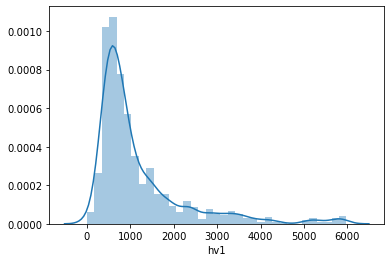

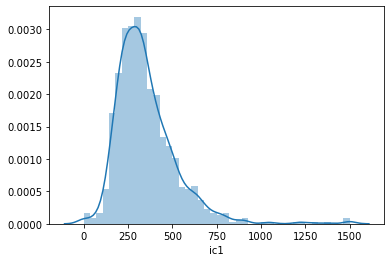

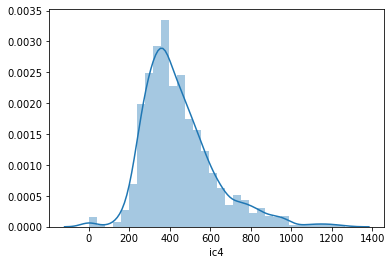

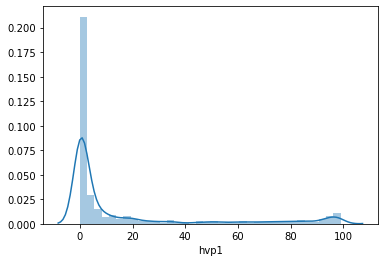

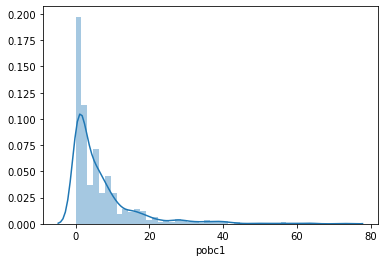

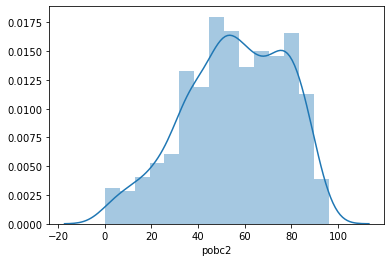

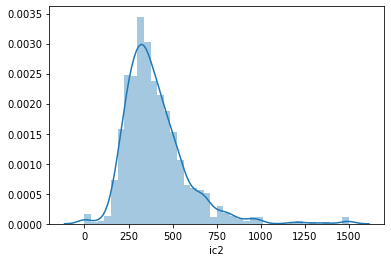

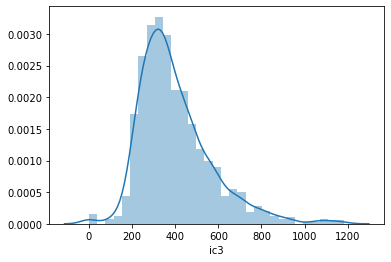

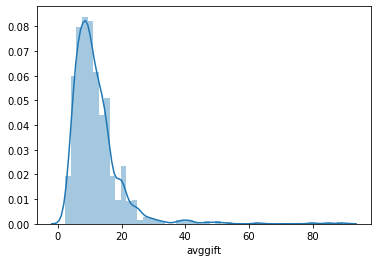

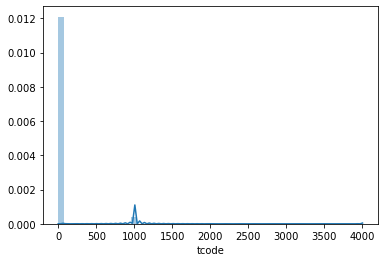

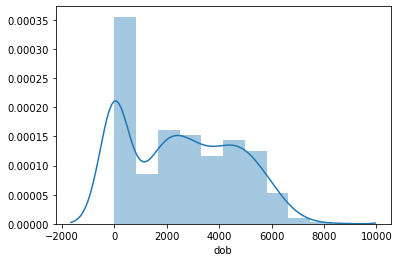

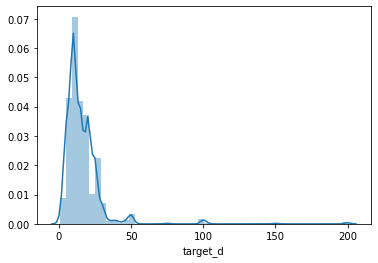

In [26]:
for column in num.columns:
    sns.distplot(df[column])
    plt.show()

##### Check correlations

In [27]:
# OPTION 1
round(df.corr(),2)

,hv1,ic1,ic4,hvp1,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,target_d
hv1,1.00,0.70,0.75,0.93,0.44,-0.31,0.74,0.73,0.14,0.14,-0.02,0.07
ic1,0.70,1.00,0.93,0.61,0.16,-0.17,0.95,0.97,0.15,0.19,0.11,0.10
ic4,0.75,0.93,1.00,0.67,0.17,-0.21,0.97,0.97,0.16,0.15,0.08,0.11
hvp1,0.93,0.61,0.67,1.00,0.43,-0.27,0.65,0.65,0.12,0.08,-0.04,0.07
pobc1,0.44,0.16,0.17,0.43,1.00,-0.40,0.16,0.17,0.06,0.04,0.00,-0.00
pobc2,-0.31,-0.17,-0.21,-0.27,-0.40,1.00,-0.18,-0.20,-0.10,-0.02,0.03,-0.04
ic2,0.74,0.95,0.97,0.65,0.16,-0.18,1.00,0.95,0.18,0.18,0.08,0.12
ic3,0.73,0.97,0.97,0.65,0.17,-0.20,0.95,1.00,0.14,0.16,0.11,0.09
avggift,0.14,0.15,0.16,0.12,0.06,-0.10,0.18,0.14,1.00,0.00,-0.01,0.66
tcode,0.14,0.19,0.15,0.08,0.04,-0.02,0.18,0.16,0.00,1.00,0.01,0.01


In [ ]:
# OPTION 2
df.corr().apply(lambda x: round(x,2))

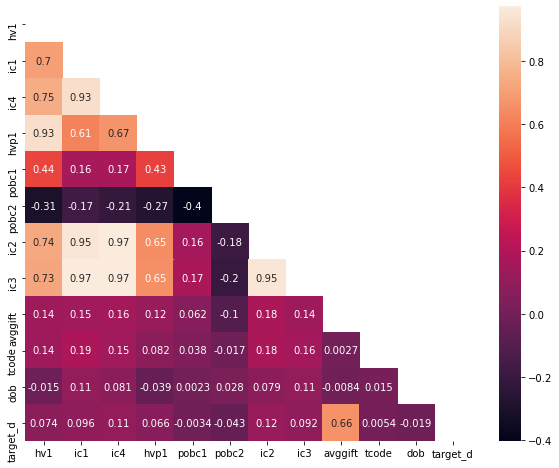

In [28]:
#HEATMAP
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

# from this you can remove multicolinearity > 0.9 with no worry...
## ... > 0.75 is better to check with the model metrics to be sure
### when removing, keep the ones that have the highest correlation with target

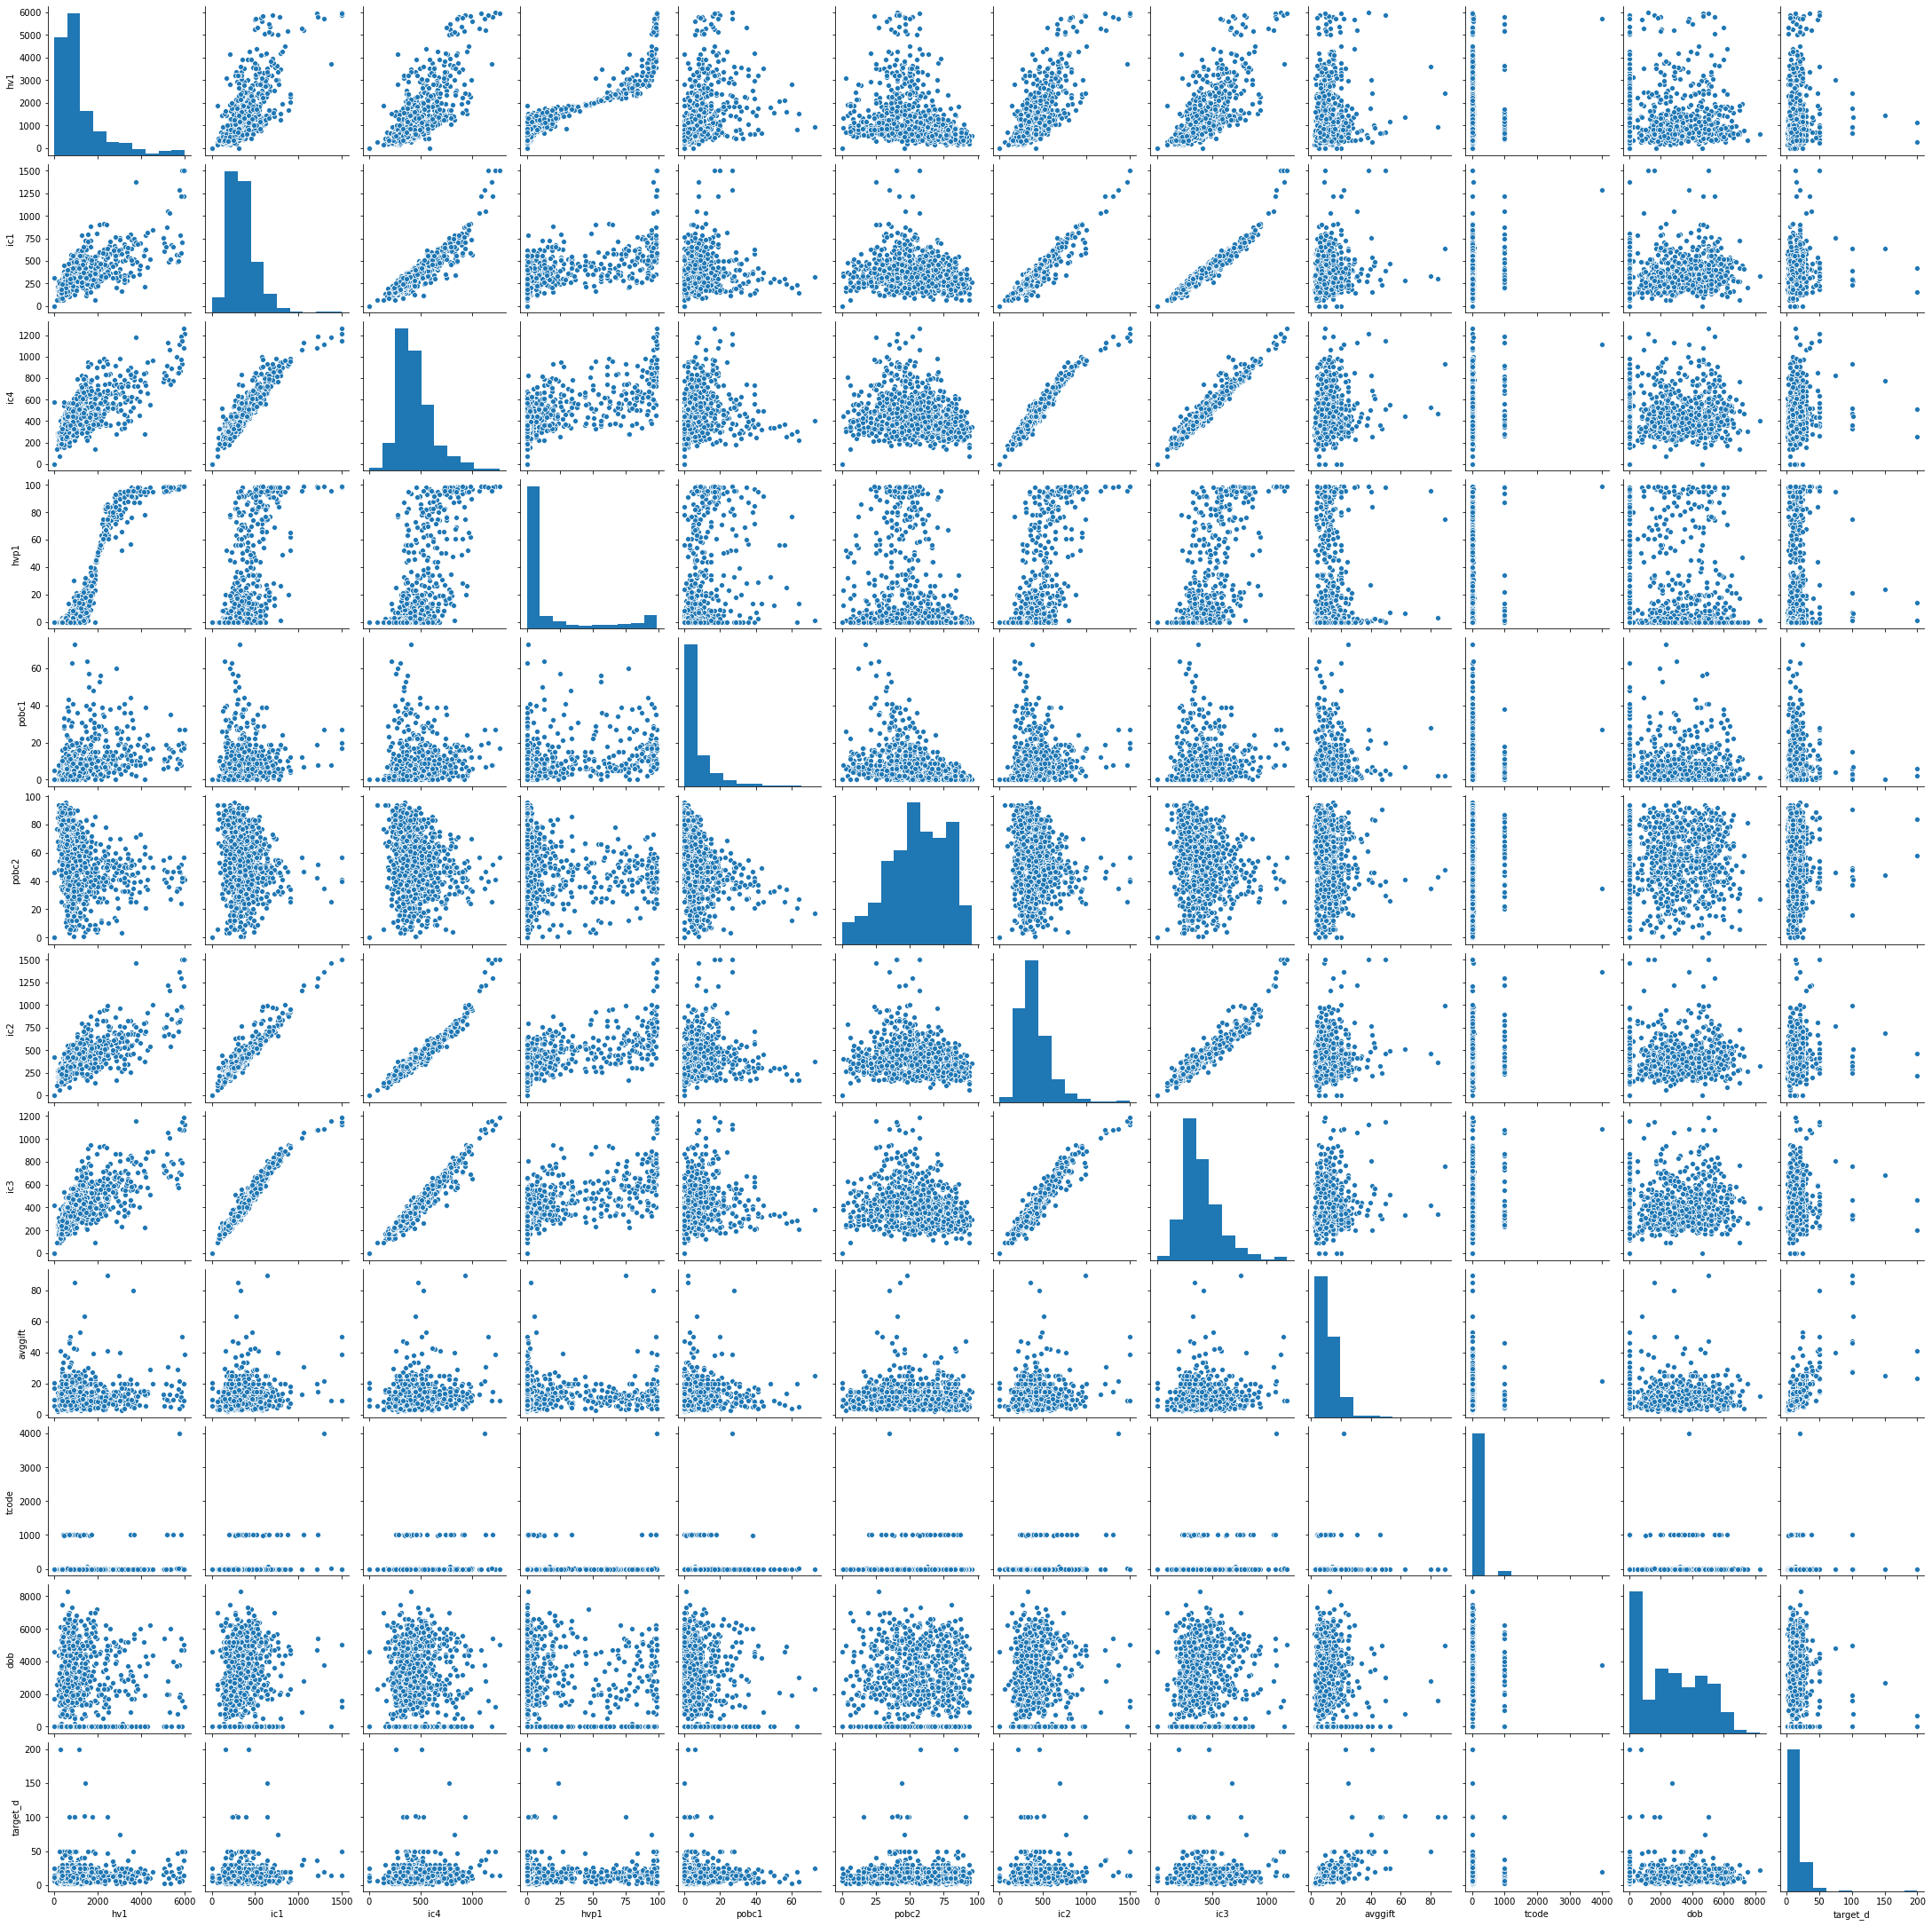

In [29]:
#covariance visualization
sns.pairplot(df)

## 5. Preprocessing

##### In the first run, I prefer not to have any scaling, just to have a benchmark on my metrics then i come back to these steps and check different scaling techniques to see which is better
##### Usually you'll choose one scaling technique for the whole dataframe. If you are going for StandardScaler, MinMaxScaler, remember to do it after the splits

#### Box-Cox Transformation

In [30]:
df_trans = df.copy()

def boxcox_transform(df):
    numeric_cols = df_trans.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df_trans[column] = np.where(df_trans[column]<=0, np.NAN, df_trans[column]) 
        df_trans[column] = df_trans[column].fillna(df_trans[column].mean())
        transformed_data, ci = stats.boxcox(df_trans[column])
        df_trans[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci
df, _ci = boxcox_transform(df_trans)
df_trans.head()

,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
controln,,,,,,,,,,,,,,,,
44060,FL,M,2.878739,5.871137,4.685367,2.678944,21975,1.878302,20.279482,4.554369,4.650519,2.517690,0.000000,604.367092,C2,4.239261
96093,IL,M,2.808201,5.802138,4.633564,5.838081,19387,0.000000,151.689562,4.534900,4.578796,1.493728,4.415020,1003.864343,T2,1.878475
43333,FL,F,2.850881,5.615602,4.588640,1.310969,18837,2.554571,21.808533,4.424318,4.506620,1.250785,4.415020,757.666285,C2,1.563120
21885,NC,M,2.903525,5.893078,4.558552,2.678944,14014,0.000000,122.480076,4.524198,4.563447,2.503163,4.415020,683.733170,T2,3.406651
190108,FL,F,2.891878,5.443502,4.462431,5.838081,17991,1.679040,5.967070,4.314482,4.430180,1.535571,3.434666,1003.864343,C2,1.563120


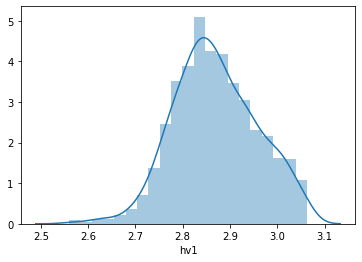

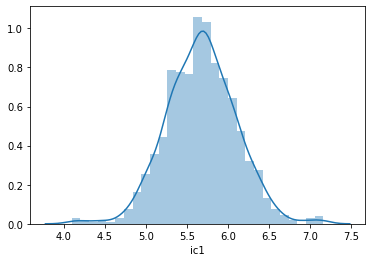

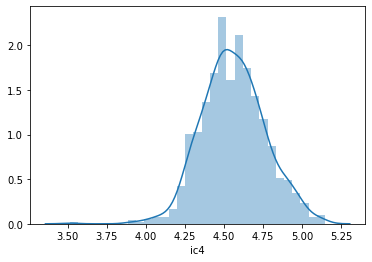

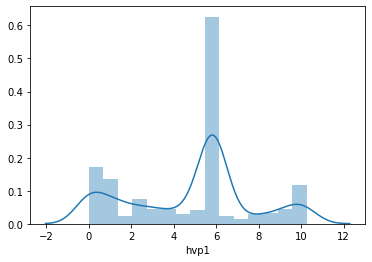

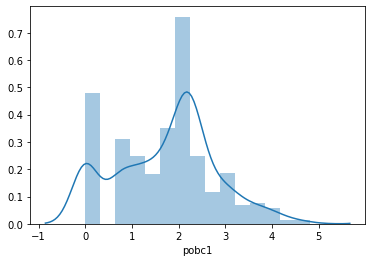

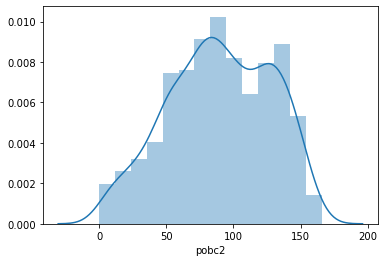

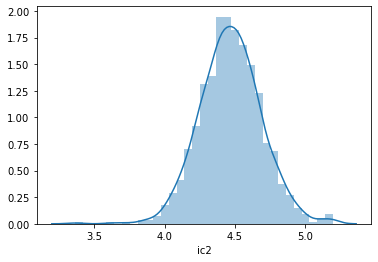

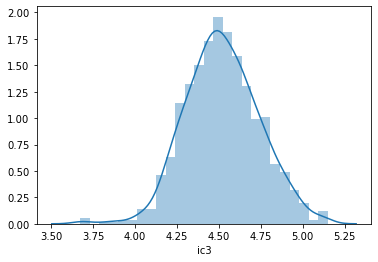

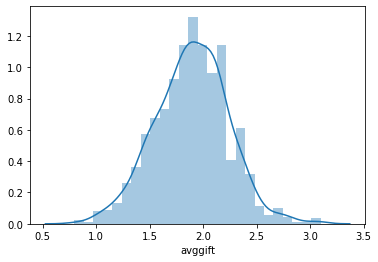

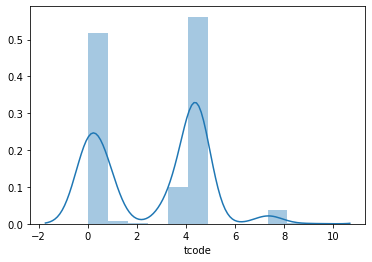

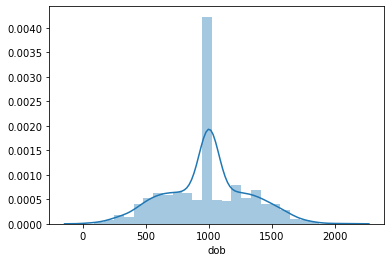

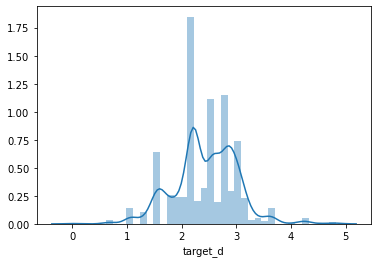

In [31]:
# See the changes in the distributions
for column in df_trans.select_dtypes(np.number).columns:
    sns.distplot(df_trans[column])
    plt.show()

#### Remove outliers

In [32]:
#FUNCTION TO REMOVE OUTLIERS
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

##### You can decide to remove outliers after log/boxcox transformation (since these might take care of some outliers for you)
##### Make sure you are droping the outliers only after the feature selection,just so you don't end up losing rows because of outliers in a column you won't use. 
##### Also we don't want to reduce our data too much

In [33]:
df1 = df.copy() #If we are not sure we use a copy df not the "good one"
df1 = remove_outliers(df1, threshold=2, skip_columns=['dob']) # we don't want to reduce our data too much,
## but we can play with the parameters to see,
## so after a better analysis we can choose which columns to drop outliers or not
df1

,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob,domain,target_d
controln,,,,,,,,,,,,,,,,
96093,IL,M,2.808201,5.802138,4.633564,5.838081,19387,0.000000,151.689562,4.534900,4.578796,1.493728,4.415020,1003.864343,T2,1.878475
43333,FL,F,2.850881,5.615602,4.588640,1.310969,18837,2.554571,21.808533,4.424318,4.506620,1.250785,4.415020,757.666285,C2,1.563120
21885,NC,M,2.903525,5.893078,4.558552,2.678944,14014,0.000000,122.480076,4.524198,4.563447,2.503163,4.415020,683.733170,T2,3.406651
190108,FL,F,2.891878,5.443502,4.462431,5.838081,17991,1.679040,5.967070,4.314482,4.430180,1.535571,3.434666,1003.864343,C2,1.563120
100640,IL,M,2.857941,6.019378,4.665069,0.000000,16022,0.705851,124.401411,4.610855,4.666977,2.466963,0.000000,1579.822903,S2,3.198733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118862,TX,M,2.874676,6.205177,4.736062,5.838081,21200,2.328306,75.863658,4.700864,4.760658,1.781607,0.000000,1163.061714,S1,2.375648
30104,GA,M,2.746812,5.420148,4.423601,5.838081,9720,2.210782,151.689562,4.366824,4.374305,1.807861,0.000000,1384.733168,R2,2.578634
154614,CA,F,2.953436,6.127211,4.702849,5.660722,15138,2.328306,111.036219,4.655343,4.718614,2.151682,4.415020,1003.864343,T1,2.837902


In [ ]:
# now filter the outliers on avggift and target_d columns with a tighter threshold
df2 = remove_outliers(df1, threshold=2, skip_columns=['avggift',"target_d"])
df2

## 6. Modeling 

### Splitting data (X-y split)

In [44]:
y = df["target_d"]
X = df.drop(['target_d'],axis=1)
X = X.drop(['state','gender','domain'],axis = 1)
X.head()

,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,tcode,dob
controln,,,,,,,,,,,,
44060,2.878739,5.871137,4.685367,2.678944,21975.0,1.878302,20.279482,4.554369,4.650519,2.517690,0.000000,604.367092
96093,2.808201,5.802138,4.633564,5.838081,19387.0,0.000000,151.689562,4.534900,4.578796,1.493728,4.415020,1003.864343
43333,2.850881,5.615602,4.588640,1.310969,18837.0,2.554571,21.808533,4.424318,4.506620,1.250785,4.415020,757.666285
21885,2.903525,5.893078,4.558552,2.678944,14014.0,0.000000,122.480076,4.524198,4.563447,2.503163,4.415020,683.733170
190108,2.891878,5.443502,4.462431,5.838081,17991.0,1.679040,5.967070,4.314482,4.430180,1.535571,3.434666,1003.864343


In [35]:
len(X)

999

### Train-test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
len(X_train)

699

In [47]:
len(y_train)

699

In [48]:
len(X_test)

300

In [49]:
len(y_test)

300

In [50]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Predict on Test Data

In [51]:
predictions = model.predict(X_test)
predictions

array([2.01213015, 1.39538403, 2.37240325, 2.34097426, 2.89383621,
       2.50542095, 2.82596701, 1.66728113, 2.65705556, 1.93536949,
       2.42728145, 2.80721565, 2.2163442 , 3.0114765 , 2.81846737,
       1.95024727, 3.07243895, 1.34909998, 1.83275329, 2.50383824,
       2.59499411, 2.42966487, 1.93915467, 2.78230964, 2.56821407,
       2.78412631, 2.47816661, 1.99247762, 2.64707511, 2.71460098,
       1.60822428, 2.34664965, 3.06129841, 2.81806431, 2.51730111,
       1.89498575, 1.744613  , 1.86112267, 2.66163011, 2.98951275,
       2.48699112, 2.69933658, 2.31467716, 2.75565513, 2.82972717,
       2.69412449, 1.74706063, 2.07729806, 2.36159855, 3.47458448,
       2.65467185, 1.85036533, 2.81508099, 2.12178936, 2.19928528,
       2.33922261, 2.68792586, 2.5155106 , 2.1978249 , 3.1235785 ,
       2.36404923, 2.45355805, 2.76575992, 2.70156172, 2.09357218,
       2.14718294, 2.40763227, 2.84895206, 3.70146087, 2.2965794 ,
       1.76672216, 3.24992527, 2.33863952, 1.69602456, 2.82483

### Evaluate the Model

#### R2, RMSE, MSE, MAE

In [52]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

# print them in a beautiful way

R2 =  0.6198377509826816
RMSE =  0.34086342482353943
The value of the metric MSE is  0.11618787438243272
MAE =  0.2553297222759984


In [54]:
np.max(y)

4.817912878584798

##### ATTENTION! We have applied the Box-Cox to the Target so we need to invert the transformation!

In [55]:
from scipy.special import inv_boxcox
predictions = inv_boxcox(predictions, _ci['target_d'])

In [56]:
# calculate the modified metrics
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

RMSE =  14.695275779804065
The value of the metric MSE is  215.951130244496
MAE =  12.335670562059052


#### Create dataframe for visualising the differences between real and predicted values

In [57]:
results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['target_d'])
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
controln,,,
156485,10.0,8.083063,1.916937
86626,6.0,4.187640,1.812360
118408,15.0,11.957447,3.042553
112461,10.0,11.553291,1.553291
113045,25.0,21.289068,3.710932
...,...,...,...
81284,25.0,17.317344,7.682656
7494,6.0,6.434849,0.434849
119038,7.0,7.891623,0.891623


In [58]:
results.sort_values('diff', ascending=False).head(50)

,true,pred,diff
controln,,,
120115,200.0,42.264689,157.735311
13188,100.0,46.800865,53.199135
141189,25.0,53.319203,28.319203
144812,50.0,76.020347,26.020347
125164,50.0,27.990429,22.009571
14394,10.0,30.527498,20.527498
182480,50.0,33.298825,16.701175
68427,25.0,41.069476,16.069476
67342,30.0,14.483932,15.516068


In [ ]:
# check predictions on donations over than 40 dollars


On the model improvement phase, going back and forth is normal
... so this isn't the end, but a new beginning ...

¯\\_(ツ)_/¯

### Represent results

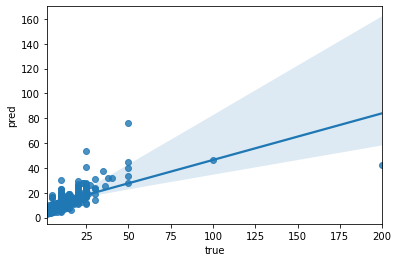

In [59]:
sns.regplot(results['true'], results['pred'])

##### Which are your conclusions after seeing the data?

In [ ]:
# The model seems to perform better in small values than in high ones. Maybe removing outliers in the target could improve the 